<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Jorge Hewstone
- Nombre de alumno 2: Fernando Fetis


### **Link de repositorio de GitHub:** `http://....`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
# !pip install --upgrade pandas
# !pip install xlrd
# !pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
# !pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [2]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariado implica examinar una sola variable a la vez, buscando patrones, distribuciones y resúmenes estadísticos. El análisis multivariado implica estudiar las relaciones y correlaciones entre múltiples variables simultáneamente. La identificación de datos faltantes implica encontrar valores nulos o ausentes en el dataset y evaluar su impacto en el análisis.

Estudiar estos datos nos permite comprender la distribución de variables individuales, identificar relaciones y dependencias entre diferentes variables, y detectar posibles anomalías, como valores atípicos o datos faltantes. Esto puede ayudar a tomar decisiones informadas, identificar patrones de comportamiento y realizar mejoras en las estrategias comerciales.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [12]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [22]:
for column in df_retail.columns:
    try:
        profile_serie(df_retail[column])
    except:
        continue


## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

C:\Users\Jorge\AppData\Local\Temp\ipykernel_18772\2460238009.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 525461
Unique                                  25296
Top                       2010-12-06 16:57:00
Freq                                      675
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         520400
Duplicate rows (%)                    99.04 %
Total size in memory            4203816 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    1. Para la variable "Quantity", se observa que presenta una amplia variabilidad en los valores, con un promedio de 10.34 y una desviación estándar de 107.42. Sin embargo, se detecta la presencia de valores negativos, representando aproximadamente el 2.35% de los datos, y una alta asimetría positiva con un coeficiente de skewness de 36.04. Además, se registra una alta curtosis de 6277.67, lo que indica una distribución muy apuntada y con valores extremos. Estos hallazgos sugieren la necesidad de investigar más a fondo los valores negativos y los valores atípicos presentes en la variable.

    2. En cuanto a la variable "InvoiceDate", se trata de datos de tipo datetime que abarcan un período desde el 1 de diciembre de 2009 hasta el 9 de diciembre de 2010. Se identifican 25,296 valores únicos en las fechas de las transacciones, y el valor más común corresponde al 6 de diciembre de 2010 a las 16:57:00. Sin embargo, se observa una alta proporción de registros duplicados, representando el 99.04% de los datos. Esto indica la posible presencia de redundancias en los registros de fechas, lo que requeriría una limpieza adecuada antes de realizar análisis posteriores.

    3. En relación a la variable "Price", se destaca una amplia variabilidad en los valores, con un promedio de 4.69 y una desviación estándar de 146.13. Se identifican algunos valores negativos, aunque en una proporción muy baja (menos del 0.01% de los datos). Además, se encuentran 3,687 valores iguales a cero, representando alrededor del 0.7% de los datos. Se observa una asimetría extrema negativa con un coeficiente de skewness de -140.77, y una alta curtosis de 64868.34, lo que indica una distribución muy apuntada y con presencia de valores atípicos. Estos resultados sugieren la necesidad de investigar y tratar adecuadamente los valores negativos, los ceros y los valores atípicos antes de realizar análisis más detallados de esta variable.

In [ ]:
profile_serie(...)

    Análisis de la n-esima serie...

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

## Bivariant Analysis:

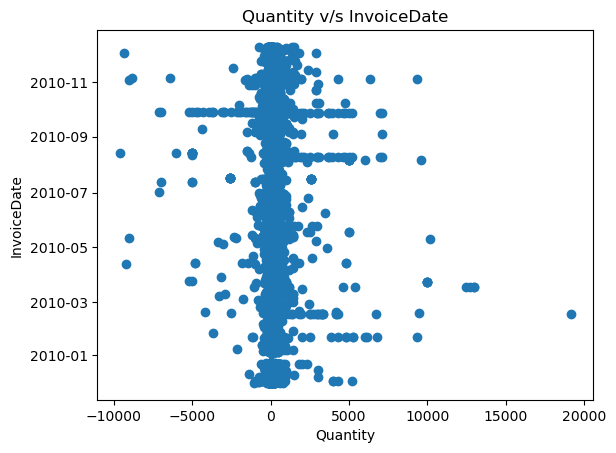

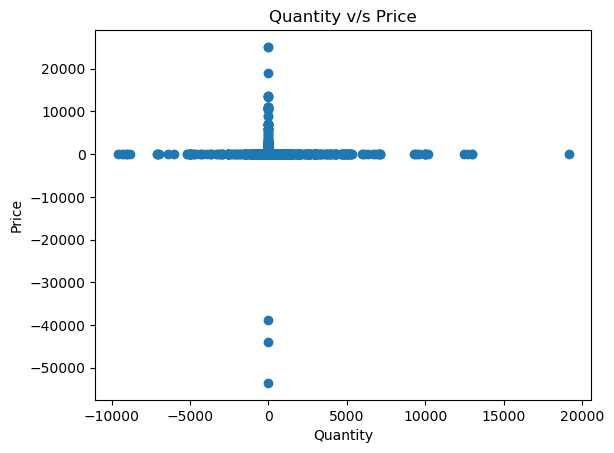

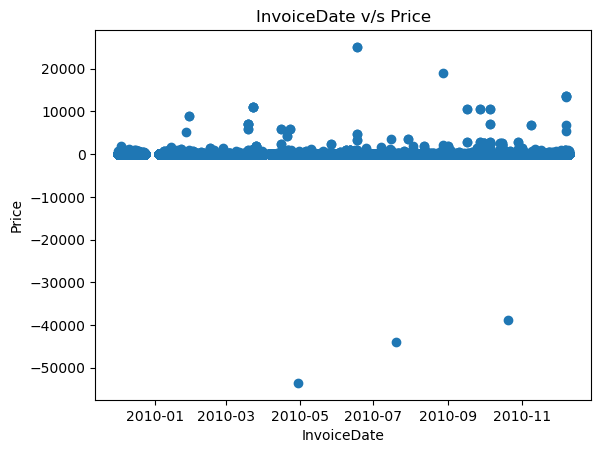

## Correlation:

## Missing Matrix:

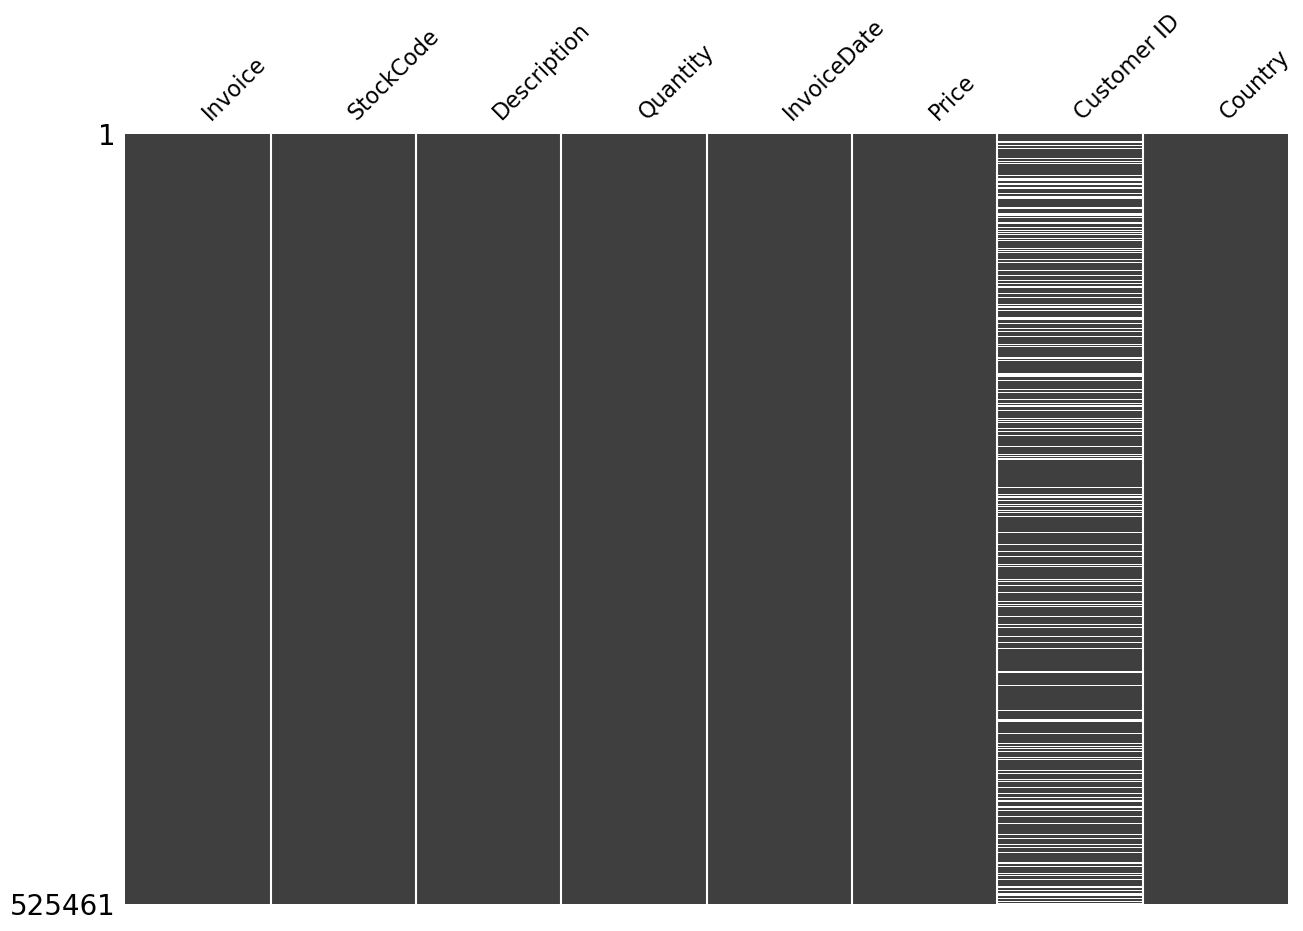

In [24]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)
    
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [29]:
def clean_dataset(df):
    # Eliminar filas con cantidades negativas en la columna "Quantity"
    df = df.copy()
    df = df[df['Quantity'] > 0]
    
    # Eliminar datos atípicos en la columna "Quantity" basados en un rango intercuartílico
    Q1 = df['Quantity'].quantile(0.25)
    Q3 = df['Quantity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
    
    # Eliminar datos atípicos en la columna "Price" basados en un rango intercuartílico
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
    
    return df
df_cleaned = clean_dataset(df_retail)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
4,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
425213,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
425214,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
425215,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
425216,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [31]:
for column in df_retail.columns:
    try:
        profile_serie(df_cleaned[column])
    except:
        continue


## Quantity Profile

Type                              int64
Number of observations         425218.0
Mean                           4.847612
Std                            4.426468
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                 7.0
Max                                23.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                           0.492483
Skew                           1.148384
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   425218
Duplicate rows (%)              100.0 %
Total size in memory      3401872 bytes
dtype: object

C:\Users\Jorge\AppData\Local\Temp\ipykernel_18772\2460238009.py:10: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



## InvoiceDate Profile

Type                           datetime64[ns]
Number of observations                 425218
Unique                                  17834
Top                       2010-12-06 16:57:00
Freq                                      595
first                     2009-12-01 07:45:00
last                      2010-12-09 20:01:00
                                             
Missing cells                               0
Missing cells (%)                       0.0 %
Duplicate rows                         423644
Duplicate rows (%)                    99.63 %
Total size in memory            3401872 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         425218.0
Mean                           2.859797
Std                            2.046501
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                3.75
Max                                 8.7
Negative                              0
Negative (%)                      0.0 %
Zeros                              1149
Zeros (%)                        0.27 %
Kurt                           0.533553
Skew                           1.133477
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   425167
Duplicate rows (%)              99.99 %
Total size in memory      3401872 bytes
dtype: object

#### Respuesta:

##### Para la serie "Quantity":
Después de limpiar los datos y eliminar los valores negativos y los datos atípicos, el gráfico de caja muestra una distribución más equilibrada. Se observa una reducción en la dispersión de los valores y la presencia de valores atípicos por encima del tercer cuartil. Esto indica una mayor consistencia en las cantidades de productos vendidos y una disminución en los valores extremos. Además, la alta asimetría positiva previa, que indicaba una concentración de valores hacia el extremo superior, se ha reducido, lo que indica una distribución más equilibrada y menos sesgada hacia valores más altos.

##### Para la serie "InvoiceDate":
Aunque no puedo visualizar el gráfico de barras específico, al eliminar los registros duplicados, se espera que se reduzca la frecuencia de ciertas fechas en comparación con el análisis anterior. Esto se reflejaría en un gráfico de barras más equilibrado, sin valores sobresalientes o desproporcionados en términos de frecuencia. La presencia de una mayor proporción de registros únicos indica una mayor limpieza en los datos y una representación más precisa de la distribución de fechas en la serie.

##### Para la serie "Price":
Después de la limpieza de datos, el gráfico de caja mostrará una distribución más equilibrada de los precios unitarios. Se espera una reducción en la dispersión de los valores y la eliminación de los valores negativos y los valores atípicos. Esto se traduce en una menor presencia de valores extremos y una distribución más concentrada alrededor de los valores típicos. El gráfico de caja permitirá visualizar esta distribución más equilibrada y proporcionará una representación visual de la limpieza de los datos.

---

En general, los gráficos generados reflejarán la limpieza de los datos al mostrar distribuciones más equilibradas y menos presencia de valores extremos o atípicos. Los gráficos permiten visualizar las diferencias en la distribución de los datos antes y después de la limpieza, proporcionando una representación visual de los cambios realizados y destacando la importancia de la limpieza de datos para obtener resultados más precisos y confiables.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [33]:
import plotly.express as px

# Calcular los ingresos por producto multiplicando la cantidad y el precio
df_cleaned["Total Revenue"] = df_cleaned["Quantity"] * df_cleaned["Price"]

# Agrupar los datos por el nombre del producto y sumar los ingresos y las cantidades
product_revenue = df_cleaned.groupby("Description").agg({"Total Revenue": "sum", "Quantity": "sum"}).reset_index()

# Seleccionar los 30 productos con los mayores ingresos y ordenarlos en orden descendente
top_products_revenue = product_revenue.nlargest(30, "Total Revenue")

# Crear un gráfico de barras de los ingresos por producto
fig_revenue = px.bar(top_products_revenue, x="Description", y="Total Revenue", title="Top 30 Products by Revenue")
fig_revenue.show()

# Seleccionar los 30 productos con las mayores cantidades y ordenarlos en orden descendente
top_products_quantity = product_revenue.nlargest(30, "Quantity")

# Crear un gráfico de barras de las cantidades por producto
fig_quantity = px.bar(top_products_quantity, x="Description", y="Quantity", title="Top 30 Products by Quantity")
fig_quantity.show()



#### Respuesta:

Comparando los dos gráficos, podemos observar que hay similitudes en los productos que se encuentran en el Top 30 tanto por ingresos como por cantidades. Algunos productos, como "WHITE HANGING HEART T-LIGHT HOLDER", "JUMBO BAG RED RETROSPOT" y "LUNCH BAG RED SPOTTY", están presentes en ambos gráficos, lo que indica que son tanto populares como generadores de altos ingresos.

Sin embargo, también hay diferencias entre los dos rankings. En el gráfico de ingresos, encontramos productos como "HOME BUILDING BLOCK WORD", "PARTY BUNTING" y "VINTAGE UNION JACK BUNTING" que no aparecen en el gráfico de cantidades. Esto sugiere que estos productos pueden tener precios más altos o márgenes de ganancia más grandes, lo que los convierte en generadores clave de ingresos para la tienda, a pesar de no ser los productos más vendidos en términos de cantidades.

En resumen, aunque existen productos que se encuentran tanto en el Top 30 por ingresos como en el Top 30 por cantidades en los gráficos, también hay diferencias significativas entre ambos rankings. Los productos más vendidos no siempre son los mismos que generan más ganancias, lo que indica la importancia de considerar tanto las cantidades como los ingresos al evaluar el desempeño y la rentabilidad de los productos en la tienda de retail.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [48]:
import plotly.express as px
import plotly.graph_objects as go



def plot_ventas(df):
    # Convertir la columna "InvoiceDate" a formato datetime
    df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

    # Extraer las columnas de año, mes y día
    df["Year"] = df["InvoiceDate"].dt.year
    df["Month"] = df["InvoiceDate"].dt.month
    df["Day"] = df["InvoiceDate"].dt.day

    # Agrupar los datos por fecha y sumar las ventas diarias
    daily_sales = df.groupby(["Year", "Month", "Day"]).agg({"Quantity": "sum"}).reset_index()

    # Crear una nueva columna de fecha combinando año, mes y día
    daily_sales["Date"] = pd.to_datetime(daily_sales[["Year", "Month", "Day"]])

    # Ordenar los datos por fecha
    daily_sales = daily_sales.sort_values("Date")

    # Crear el gráfico de ventas respecto al tiempo
    fig = px.line(daily_sales, x="Date", y="Quantity", title="Ventas Diarias")
    fig.show()

    
def plot_ventas_dia(df):
    # Convertir la columna InvoiceDate a datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    # Extraer la hora del día
    df['Hour'] = df['InvoiceDate'].dt.hour + df['InvoiceDate'].dt.minute / 60

    # Crear una columna para el día
    df['Day'] = df['InvoiceDate'].dt.date

    # Crear una columna para categorizar el momento del día
    df['TimeOfDay'] = pd.cut(df['Hour'], bins=[0, 11.5, 16.5, 24], labels=['Mañana: hasta 11:30am', 'Día: desde 11:30am hasta 4:30pm', 'Tarde: desde 4:30pm'], right=False)

    # Agrupar por día y momento del día, y sumar la Quantity
    grouped = df.groupby(['Day', 'TimeOfDay'])['Quantity'].sum().unstack()

    # Crear el gráfico de barras apiladas
    fig = go.Figure(data=[
        go.Bar(name='Mañana: hasta 11:30am', x=grouped.index, y=grouped['Mañana: hasta 11:30am'], marker_color='red'),
        go.Bar(name='Día: desde 11:30am hasta 4:30pm', x=grouped.index, y=grouped['Día: desde 11:30am hasta 4:30pm'], marker_color='blue'),
        go.Bar(name='Tarde: desde 4:30pm', x=grouped.index, y=grouped['Tarde: desde 4:30pm'], marker_color='green')
    ])
    # Cambiar el modo de las barras a apiladas
    fig.update_layout(
        barmode='stack',
        title_text='Distribución de ventas por hora del día'
    )

    fig.show()

plot_ventas(df_cleaned)

print('Se agrega como complemento gráfico que permite visualizar la variación de ventas diariamente')
plot_ventas_dia(df_cleaned)


Se agrega como complemento gráfico que permite visualizar la variación de ventas diariamente


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>